## Mission: 가즈아!

서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 **Moving Average(이동평균법)** 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

### Core Mission

[다음 데이터](https://www.kaggle.com/rishidamarla/bitcoin-prices-20112015)가 주어졌을 때 2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요.

- 선의 색깔은 **노란색(#f2a900)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.
💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bitcoin = pd.read_csv("./BitCoin.csv")
bitcoin.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [35]:
bitcoin.Date.dtypes

dtype('O')

In [73]:
# 오브젝트형 날짜 데이터 날짜로 바꾸기 및 데이터 전처리 과정

bitcoin['Date'] = pd.to_datetime(bitcoin['Date'],infer_datetime_format = True)

filter1 = (bitcoin['Date'] >= '2016-06-01') & (bitcoin["Date"] <= '2017-06-30')

filtered_df = bitcoin.loc[filter1]
filtered_df = filtered_df.sort_values(by = ["Date"],ascending = True)
filtered_df
 

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
625,625,2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000
594,594,2016-06-02,386.59,386.63,372.39,376.52,4.924930e+07,5865740000
565,565,2016-06-03,400.52,411.91,395.78,407.71,9.121250e+07,6121400000
534,534,2016-06-04,424.28,424.53,422.73,423.41,5.909100e+07,6533260000
504,504,2016-06-05,447.94,461.38,447.07,459.60,7.279680e+07,6947800000
...,...,...,...,...,...,...,...,...
88,88,2017-06-26,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000
87,87,2017-06-27,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000
86,86,2017-06-28,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000
85,85,2017-06-29,2567.56,2588.83,2510.48,2539.32,9.499790e+08,42150300000


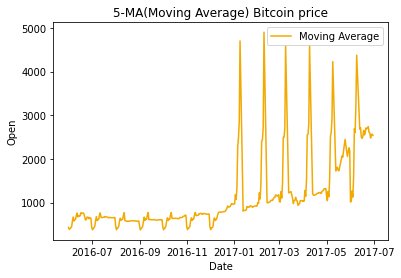

In [74]:
x = filtered_df["Date"]
y = filtered_df["Open"]
plt.xlabel("Date")
plt.ylabel("Open")
plt.yticks()
plt.title("5-MA(Moving Average) Bitcoin price")
plt.plot(x,y,label = "Moving Average",color = "#f2a900")
plt.legend(loc ="best")
plt.show()

### Bonus Mission
해당 그래프를 본 나일론 마스크씨는 정신을 차렸다. 정확히는 비트코인만 바라본 본인을 말이다. 정말 많은 가상화폐가 있는데 비트코인만 바라본 본인을 돌아보게 되었다. 더불어 가장 핫한 코인인 이더리움 또한 관심이 생겼는데, 마스크씨는 2017년 한 해에 이 두개의 추세를 비교하고싶어 한다. 마스크씨를 도와 비트코인과 이더리움의 가격 추세 비교를 도와주자.

위에 주어진 데이터와 더불어 [다음 데이터](https://www.kaggle.com/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv)도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에** 그려주세요.

- 선의 색깔은 비트코인 : **노란색(#f2a900)**, 이더리움 : **검은색(#3c3c3d)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [75]:
ethereum = pd.read_csv("./ETH_day.csv")
ethereum.head()

# 오브젝트형 날짜 데이터 날짜로 바꾸기 및 데이터 전처리 과정

ethereum['Date'] = pd.to_datetime(ethereum['Date'],infer_datetime_format = True)

filter2 = (ethereum['Date'] >= '2016-06-01') & (ethereum["Date"] <= '2017-06-30')

filtered_df2 = iderium.loc[filter2]
filtered_df2 = filtered_df2.sort_values(by = ["Date"],ascending = True)
filtered_df2
 

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38
1412,2016-06-03,ETHUSD,13.90,16.05,13.50,14.02,11426.53,157342.19
1411,2016-06-04,ETHUSD,14.02,14.16,13.64,13.86,4330.50,59977.39
1410,2016-06-05,ETHUSD,13.86,13.92,13.70,13.91,787.49,10869.67
...,...,...,...,...,...,...,...,...
1024,2017-06-26,ETHUSD,278.73,299.90,210.00,253.00,249076.24,60950252.99
1023,2017-06-27,ETHUSD,253.00,288.17,210.02,286.21,173179.40,42085473.60
1022,2017-06-28,ETHUSD,286.21,324.95,260.49,317.59,184030.56,54573461.77
1021,2017-06-29,ETHUSD,317.59,322.84,285.23,293.80,152271.32,46521350.06


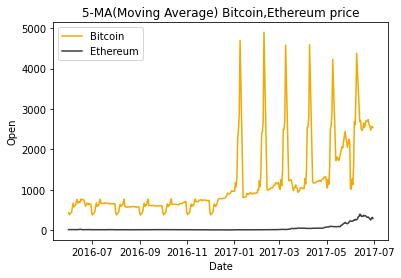

In [76]:
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("5-MA(Moving Average) Bitcoin,Ethereum price")
plt.plot(filtered_df["Date"],filtered_df["Open"],label = "Bitcoin",color = "#f2a900")
plt.plot(filtered_df2["Date"],filtered_df2["Open"],label = "Ethereum",color = "#3c3c3d")
plt.legend(loc ="best")
plt.show()